In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import imutils
import math

In [2]:
image = cv2.imread("Samples/Sample1.png")
image =  cv2.GaussianBlur(image,(1,1), cv2.BORDER_TRANSPARENT)
image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

In [3]:
shapes = {}

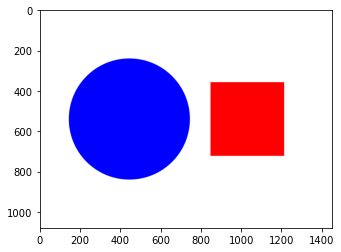

In [4]:
plt.imshow(image,cmap="gray")
plt.show()

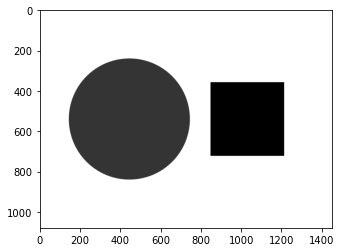

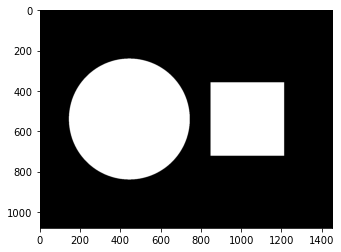

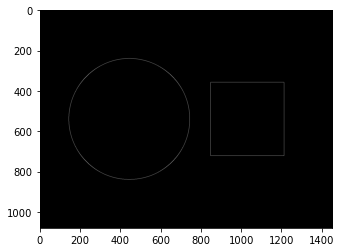

In [5]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(image,100,255,cv2.THRESH_BINARY_INV)[1]
edges = cv2.Canny(thresh,90,200,True)
plt.imshow(image,cmap="gray")
plt.show()
plt.imshow(thresh,cmap="gray")
plt.show()
plt.imshow(edges,cmap="gray")
plt.show()

In [6]:
'''blue_lower = np.array([94, 20, 0], np.uint8) 
blue_upper = np.array([140,255 ,255], np.uint8) 
blue_mask = cv2.inRange(image, blue_lower, blue_upper) 
#blue_mask =  cv2.cvtColor(blue_mask,cv2.COLOR_HSV2RGB)
plt.imshow(blue_mask,cmap="gray")
plt.show()

#blue_gray=cv2.threshold(blue_mask, 120,225, cv2.THRESH_BINARY_INV)[1]
#plt.imshow(blue_gray,cmap="gray")
#plt.show()
edges = cv2.Canny(blue_mask,90,200,True)
plt.imshow(edges,cmap="gray")
plt.show()
'''


'blue_lower = np.array([94, 20, 0], np.uint8) \nblue_upper = np.array([140,255 ,255], np.uint8) \nblue_mask = cv2.inRange(image, blue_lower, blue_upper) \n#blue_mask =  cv2.cvtColor(blue_mask,cv2.COLOR_HSV2RGB)\nplt.imshow(blue_mask,cmap="gray")\nplt.show()\n\n#blue_gray=cv2.threshold(blue_mask, 120,225, cv2.THRESH_BINARY_INV)[1]\n#plt.imshow(blue_gray,cmap="gray")\n#plt.show()\nedges = cv2.Canny(blue_mask,90,200,True)\nplt.imshow(edges,cmap="gray")\nplt.show()\n'

In [7]:
'''def detect(c):
        
        # initialize the shape name and approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.001* peri, True)
        M = cv2.moments(c)
        cX = int((M["m10"] / M["m00"])) #X co-ordinate of the centroid of the shape
        cY = int((M["m01"] / M["m00"])) #Y co-ordinate of the centroid of the shape
        shape = "unidentified" #Initialize a variable of string type
    
        area = cv2.contourArea(approx)
        
        
        #Triangle if it shape has three sides
        if len(approx) == 3:
            shape = "Triangle"
        
        elif len(approx) == 4:
            #Call rect() to detect the shape
            angle,op_angle,cong_diag,op_side_eq,all_sides_cong = rect(c)

            #If opposite angles and sides are equal and diagonals are congruent, it must be a parallelogram
            if op_angle and op_side_eq and cong_diag:
                #If all angles and sides are equal, aspect ratio is 1 and diagonals are congruent, it must be a square
                if angle and cong_diag and all_sides_cong:
                    shape='Square'
                elif not(angle) or not(cong_diag) and all_sides_cong:
                    #If aspect ratio is not 1 and angles are not 90, it must be a rhombus
                    shape = 'Rhombus'
                #Otherwise, its a parallelogram
                else:
                    shape = 'Parallelogram'
            #If diagonals are not congruent, aspect ratio is not 1, opposite angles are not equal and
            #all angles are not 90 degrees, it is a trapezium
            elif not(cong_diag) and not(angle) or not(op_angle):
                shape='Trapezium'
            #Otherwise, it is a quadrilateral
            else: shape='Quadrilateral'
        #Pentagon if shape has 5 sides
        elif len(approx) == 5:
            shape = "Pentagon"
        #Hexagon if shape has 6 sides
        elif len(approx) == 6:
            shape = "Hexagon"
        # otherwise, we assume the shape is a circle
        else:
            shape = "Circle"
        #return area rounded off to 1 decimal place
        return shape, float(round(int(area),1)), cX, cY'''

'def detect(c):\n        \n        # initialize the shape name and approximate the contour\n        peri = cv2.arcLength(c, True)\n        approx = cv2.approxPolyDP(c, 0.001* peri, True)\n        M = cv2.moments(c)\n        cX = int((M["m10"] / M["m00"])) #X co-ordinate of the centroid of the shape\n        cY = int((M["m01"] / M["m00"])) #Y co-ordinate of the centroid of the shape\n        shape = "unidentified" #Initialize a variable of string type\n    \n        area = cv2.contourArea(approx)\n        \n        \n        #Triangle if it shape has three sides\n        if len(approx) == 3:\n            shape = "Triangle"\n        \n        elif len(approx) == 4:\n            #Call rect() to detect the shape\n            angle,op_angle,cong_diag,op_side_eq,all_sides_cong = rect(c)\n\n            #If opposite angles and sides are equal and diagonals are congruent, it must be a parallelogram\n            if op_angle and op_side_eq and cong_diag:\n                #If all angles and sides 

In [8]:
'''def rect(c):
    perimeter = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.01*perimeter,True)
    if(len(approx)== 4):
        pts = approx.reshape(4, 2)

        #Vertex co-ordinates
        x1= int(pts[0][0])
        y1= int(pts[0][1])
        x2= int(pts[1][0])
        y2= int(pts[1][1])
        x3= int(pts[2][0])
        y3= int(pts[2][1])
        x4= int(pts[3][0])
        y4= int(pts[3][1])

        #length of each side
        first_side = round(np.sqrt((x1 - x2)**2 + (y1 - y2)**2))
        second_side = round(np.sqrt((x2 - x3)**2 + (y2 - y3)**2))
        third_side = round(np.sqrt((x3 - x4)**2 + (y3 - y4)**2))
        fourth_side = round(np.sqrt((x4 - x1)**2 + (y4 - y1)**2))
        op_side_eq= (-2.0<=round(abs(first_side-third_side),1)<=2.0 and -2.0<=round(abs(second_side-fourth_side),1)<=2.0)
        all_sides_cong=((abs(first_side+third_side)-abs(second_side+fourth_side)) in np.arange(-5,5))

        #If aspect ratio is 1 or not. Useful to distinguish between Square and Rhombus
#         ar= op_side_eq and all_sides_cong
        #To check if diagonals are congruent by checking distance of four vertices from the intersection point
        int_point=line_intersect(x1,y1,x3,y3,x2,y2,x4,y4)
        first_diag_1 = round(np.sqrt((int_point[0] - x1)**2 + (int_point[1] - y1)**2))
        first_diag_2 = round(np.sqrt((int_point[0] - x3)**2 + (int_point[1] - y3)**2))
        second_diag_1 = round(np.sqrt((int_point[0] - x2)**2 + (int_point[1] - y2)**2))
        second_diag_2 = round(np.sqrt((int_point[0] - x4)**2 + (int_point[1] - y4)**2))
#       Keeping an error of +-5 pixels in calculation and detection
        cong_diag=(-5<=abs(first_diag_1-first_diag_2)<=5  and -5<=abs(second_diag_1-second_diag_2)<=5)
        
        #To find if opposite angles are equal
        line_1 = (abs(x2-x1), abs(y2-y1))
        line_2 = (abs(x3-x2), abs(y3-y2))
        line_3 = (abs(x4-x3), abs(y4-y3))
        line_4 = (abs(x4-x1), abs(y4-y1))
        dot_product_1 = np.dot(line_1, line_2) / (np.linalg.norm(line_1) * np.linalg.norm(line_2))
        dot_product_2 = np.dot(line_3, line_2) / (np.linalg.norm(line_2) * np.linalg.norm(line_3))
        dot_product_3 = np.dot(line_4, line_3) / (np.linalg.norm(line_3) * np.linalg.norm(line_4))
        dot_product_4 = np.dot(line_1, line_4) / (np.linalg.norm(line_4) * np.linalg.norm(line_1))
        angle1 = round(180-np.degrees(np.arccos(dot_product_1)))
        angle2 = round(np.degrees(np.arccos(dot_product_2)))
        angle3 = round(180-np.degrees(np.arccos(dot_product_3)))
        angle4 = round(np.degrees(np.arccos(dot_product_4)))
        
        op_angle = -1.0<=(abs(angle3-angle1)-abs(angle4-angle2))<=1.0
        
        #To find if all angles are 90 degree
        angle=(abs(angle1)==abs(angle2)==abs(angle3)==abs(angle4)==90)
        
        #return list containing bool values of required properties
        ret_value =  [angle, op_angle, cong_diag,op_side_eq, all_sides_cong]
        return ret_value'''

'def rect(c):\n    perimeter = cv2.arcLength(c,True)\n    approx = cv2.approxPolyDP(c,0.01*perimeter,True)\n    if(len(approx)== 4):\n        pts = approx.reshape(4, 2)\n\n        #Vertex co-ordinates\n        x1= int(pts[0][0])\n        y1= int(pts[0][1])\n        x2= int(pts[1][0])\n        y2= int(pts[1][1])\n        x3= int(pts[2][0])\n        y3= int(pts[2][1])\n        x4= int(pts[3][0])\n        y4= int(pts[3][1])\n\n        #length of each side\n        first_side = round(np.sqrt((x1 - x2)**2 + (y1 - y2)**2))\n        second_side = round(np.sqrt((x2 - x3)**2 + (y2 - y3)**2))\n        third_side = round(np.sqrt((x3 - x4)**2 + (y3 - y4)**2))\n        fourth_side = round(np.sqrt((x4 - x1)**2 + (y4 - y1)**2))\n        op_side_eq= (-2.0<=round(abs(first_side-third_side),1)<=2.0 and -2.0<=round(abs(second_side-fourth_side),1)<=2.0)\n        all_sides_cong=((abs(first_side+third_side)-abs(second_side+fourth_side)) in np.arange(-5,5))\n\n        #If aspect ratio is 1 or not. Useful to 

In [9]:
'''def line_intersect(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    """ returns a (x, y) tuple or None if there is no intersection """
    d = (By2 - By1) * (Ax2 - Ax1) - (Bx2 - Bx1) * (Ay2 - Ay1)
    if d:
        uA = ((Bx2 - Bx1) * (Ay1 - By1) - (By2 - By1) * (Ax1 - Bx1)) / d
        uB = ((Ax2 - Ax1) * (Ay1 - By1) - (Ay2 - Ay1) * (Ax1 - Bx1)) / d
    else:
        return
    if not(0 <= uA <= 1 and 0 <= uB <= 1):
        return
    x = Ax1 + uA * (Ax2 - Ax1)
    y = Ay1 + uA * (Ay2 - Ay1)
 
    return int(x), int(y)'''

'def line_intersect(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):\n    """ returns a (x, y) tuple or None if there is no intersection """\n    d = (By2 - By1) * (Ax2 - Ax1) - (Bx2 - Bx1) * (Ay2 - Ay1)\n    if d:\n        uA = ((Bx2 - Bx1) * (Ay1 - By1) - (By2 - By1) * (Ax1 - Bx1)) / d\n        uB = ((Ax2 - Ax1) * (Ay1 - By1) - (Ay2 - Ay1) * (Ax1 - Bx1)) / d\n    else:\n        return\n    if not(0 <= uA <= 1 and 0 <= uB <= 1):\n        return\n    x = Ax1 + uA * (Ax2 - Ax1)\n    y = Ay1 + uA * (Ay2 - Ay1)\n \n    return int(x), int(y)'

In [10]:
cnts= cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



len(cnts)

2

In [11]:
if type(cnts[-1]) !=type(None) :
        if len(cnts) == 2:
            cnts = cnts[0]
        elif len(cnts) == 3:
            cnts = cnts[1]
        for i in cnts:
            
            
            ret_values=detect(i)
            #Add detected shape and corresponding outputs in the dictionary
            shapes[ret_values[0]]=['blue',ret_values[1], ret_values[2], ret_values[3]]

NameError: name 'detect' is not defined

In [ ]:
print(shapes)

In [ ]:
282084.0- 284410.0

In [ ]:
284410.0/100



In [ ]:
133585-134684

In [ ]:
134684/100
